# Machine learning
**Dataset `spam`**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

## 1. Importation des données

In [2]:
url = 'https://archive.ics.uci.edu/static/public/94/data.csv'
data = pd.read_csv(url, header=0, sep=',', decimal='.')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 2. Création d'un jeu de données d'apprentissage et de test

In [5]:
target = 'Class'
features = list(data.columns.difference([target]))

X = data[features]
y = data[target]

In [6]:
# Renommage des colonnes pour le XGBoost
X.columns = [f"Column_{i}" for i in range(X.shape[1])]

In [7]:
test_portion = 1/5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion, shuffle=True)

print('Dimensions X_train :', X_train.shape)
print('Dimensions y_train :', y_train.shape)
print('Dimensions X_test :', X_test.shape)
print('Dimensions y_test :', y_test.shape)

Dimensions X_train : (3680, 57)
Dimensions y_train : (3680,)
Dimensions X_test : (921, 57)
Dimensions y_test : (921,)


## 3. Normalisation des covariables (si besoin)

In [8]:
mean_std_scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train)

X_train_sc = mean_std_scaler.transform(X_train)
X_test_sc = mean_std_scaler.transform(X_test)

## 4. Modélisation

### 4.1. CART

Avec un "petit" arbre (profondeur maximale de 2) :

Matrice de confusion CART :
 [[528  40]
 [105 248]]
Exactitude CART: 0.84
AUC : 0.82


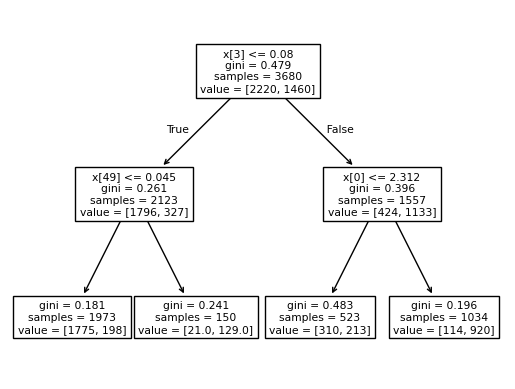

In [9]:
cart_model = DecisionTreeClassifier(max_depth=2)
cart = cart_model.fit(X_train, y_train)

plot_tree(cart)

prob_test_pred_cart = cart.predict(X_test)

confusion_matrix_cart = confusion_matrix(y_test, prob_test_pred_cart)
print('Matrice de confusion CART :\n', confusion_matrix_cart)

accuracy_cart = accuracy_score(y_test, prob_test_pred_cart)
print(f'Exactitude CART: {accuracy_cart:.2f}')

auc_cart = roc_auc_score(y_test, prob_test_pred_cart)
print(f'AUC : {auc_cart:.2f}')

Avec un "grand" arbre :

In [10]:
cart_model = DecisionTreeClassifier()
cart = cart_model.fit(X_train, y_train)

prob_test_pred_cart = cart.predict(X_test)

confusion_matrix_cart = confusion_matrix(y_test, prob_test_pred_cart)
print('Matrice de confusion CART:\n', confusion_matrix_cart)

accuracy_cart = accuracy_score(y_test, prob_test_pred_cart)
print(f'Exactitude CART: {accuracy_cart:.2f}')

auc_cart = roc_auc_score(y_test, prob_test_pred_cart)
print(f'AUC : {auc_cart:.2f}')

Matrice de confusion CART:
 [[519  49]
 [ 34 319]]
Exactitude CART: 0.91
AUC : 0.91


### 4.2. Gradient boosting

#### Avec XGBoost

In [11]:
# Créer un modèle XGBoost
model = XGBClassifier(
    eval_metric='logloss',
    learning_rate=0.1,
    n_estimators=100,
    )

# Entraîner le modèle
model.fit(X_train, y_train)

/home/onyxia/work/.venv/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [12]:
# Prédire sur les données de test
y_pred = model.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy du modèle XGBoost : {accuracy:.4f}')

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matrice de confusion :\n', conf_matrix)

Accuracy du modèle XGBoost : 0.9425
Matrice de confusion :
 [[552  16]
 [ 37 316]]


#### Avec Sklearn

In [ ]:
# Définition du modèle
model = GradientBoostingClassifier()

# Définition des paramètres à tester pour GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],   # Nombre d'arbres
    'learning_rate': [0.01, 0.1, 0.2], # Taux d'apprentissage
    'loss': ['log_loss', 'exponential']
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # Validation croisée en 5 plis
    scoring='accuracy',
)

# Lancement de la recherche des meilleurs paramètres
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleur score de validation :", grid_search.best_score_)

# Réentraînement du modèle avec les meilleurs paramètres sur les données d'entraînement
best_model = grid_search.best_estimator_

# Prédiction sur les données de test
y_pred = best_model.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy du modèle Gradient Boosting avec GridSearch : {accuracy:.4f}')

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matrice de confusion :\n', conf_matrix)

### 4.3. SVM

In [ ]:
# Définition du classifieur de base
clf = SVC()

# Définition de la grille de paramètres
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly'],
}

# Création de l'objet GridSearchCV
# cv=5 pour une validation croisée en 5 plis
# scoring='accuracy' pour maximiser la précision
# n_jobs=-1 pour utiliser tous les cœurs disponibles en parallèle
grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Entraînement du GridSearch sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score obtenu
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleure performance (score) :", grid_search.best_score_)

# Récupération du meilleur modèle
best_model = grid_search.best_estimator_

# Évaluation sur les données de test
test_score = best_model.score(X_test, y_test)
print("Score sur le jeu de test :", test_score)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


### 4.4.

### 4.5. Random forest

In [ ]:
n_folds = 10

params = {
    'n_estimators': [250, 500, 750, 1000]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=n_folds, n_jobs=-1, verbose=1)
# n_jobs=-1 : pour utiliser tous les core disponibles
# scoring='accuracy' : exactitude
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [250, 500, 750, 1000]},
             scoring='accuracy', verbose=1)

In [ ]:
print('Hyperparamètre optimal :', rf_grid.best_params_)

prob_test_pred_rf = rf_grid.predict(X_test)

confusion_matrix_rf = confusion_matrix(y_test, prob_test_pred_rf)
print('Matrice de confusion random forest :\n', confusion_matrix_rf)

accuracy_rf = accuracy_score(y_test, prob_test_pred_rf)
print(f'Exactitude random forest : {accuracy_rf:.2f}')

auc_rf = roc_auc_score(y_test, prob_test_pred_rf)
print(f'AUC random forest : {auc_rf:.2f}')

Hyperparamètre optimal : {'n_estimators': 250}
Matrice de confusion random forest :
 [[560  12]
 [ 29 320]]
Exactitude random forest : 0.96
AUC random forest : 0.95


### 4.6. Decision Forest TF

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# Diviser les données en entraînement et test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Convertir en tf.data.Dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Class")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Class")

# Définir le modèle (Random Forest Classifier)
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

# Entraîner le modèle
model.fit(train_ds)

# Évaluation du modèle
evaluation = model.evaluate(test_ds, return_dict=True)
print("Évaluation sur les données de test :", evaluation)


2024-12-17 14:32:47.628898: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734445967.658945   29453 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734445967.670071   29453 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 14:32:47.707453: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


I0000 00:00:1734445971.902707   29453 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13764 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:86:00.0, compute capability: 7.5


Use /tmp/tmp3k5qijn8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:10.088208. Found 3680 examples.
Training model...


I0000 00:00:1734445982.717019   29453 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1734445982.717092   29453 kernel.cc:783] Collect training examples
I0000 00:00:1734445982.717112   29453 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1734445982.718157   29453 kernel.cc:401] Number of batches: 4
I0000 00:00:1734445982.718179   29453 kernel.cc:402] Number of examples: 3680
I0000 00:00:1734445982.721874   29453 kernel.cc:802] Training dataset:
Number of records: 3680
Number of columns: 58

Number of columns by type:
	NUMERICAL: 57 (98.2759%)
	CATEGORICAL: 1 (1.72414%)

Columns:

NUMERICAL: 57 (98.2759%)
	1: "capital_run_length_av

Model trained in 0:00:01.709870
Compiling model...


I0000 00:00:1734445984.359455   29453 decision_forest.cc:761] Model loaded with 300 root(s), 78114 node(s), and 56 input feature(s).
I0000 00:00:1734445984.362707   29453 abstract_model.cc:1404] Engine "RandomForestOptPred" built
2024-12-17 14:33:04.362806: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 644ms/step - loss: 0.0000e+00
Évaluation sur les données de test : {'loss': 0.0}
